# Analyse data based "sirene_nice"

In [1]:
import os
# Path
path_v2=".."
path_v3 = "raw_data"
fichier='sirene_nice_clean.csv'
  
# Join various path components 
fichier=os.path.join(path_v2,path_v3, fichier)
fichier

'../raw_data/sirene_nice_clean.csv'

In [2]:
# #IMPORT DE GOOGLE LOUD STORAGE
# fichier='gs://trampact_storage/data/sirene_nice_clean.csv'

In [3]:
import pandas as pd
entreprise_df_copy = pd.read_csv(fichier)
entreprise_df_copy

/home/lewagon/.pyenv/versions/3.8.6/envs/trampact/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (1,81) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,SIREN,NIC,siret,Statut de diffusion de l'établissement,Date de création de l'établissement,effectifs,Année de la tranche d'effectif de l'établissement,Activité principale de l'établissement,Date de la dernière mise à jour de l'établissement,...,Classe de l'unité légale,SIRET du siège de l'unité légale,Nature juridique de l'unité légale,Première ligne de l'adressage,Date de fermeture de l'unité légale,Filename,y,x,distance tram t1,proche t1
0,0,337723027,13,33772302700013,O,1944-08-28,1,,67.04,1944-08-28 00:00:00,...,Debits de boissons (sans spectacle),33772302700013,Entrepreneur individuel,Monsieur MAX CHARASSE,1988-09-20,sirene_v3_42,43.700752,7.274309,286.18,oui
1,1,353509078,13,35350907800013,O,1990-01-15,1,,70.2C,1944-08-28 00:00:00,...,Commerce de gros de fruits et legumes,35350907800013,Société à responsabilité limitée (sans autre i...,BANAFRUIT,1944-08-28,sirene_v3_61,43.668033,7.208477,6538.89,non
2,2,353509078,21,35350907800021,O,1991-10-01,1,,51.3A,1944-08-28 00:00:00,...,Commerce de gros de fruits et legumes,35350907800013,Société à responsabilité limitée (sans autre i...,BANAFRUIT,1944-08-28,sirene_v3_61,43.668033,7.208477,6538.89,non
3,3,353509086,24,35350908600024,O,1991-01-03,1,,70.2A,1944-08-28 00:00:00,...,Location de logements,35350908600040,Société en nom collectif,SNC L'ORME,1944-08-28,sirene_v3_61,43.702428,7.271502,383.64,oui
4,4,393719638,16,39371963800016,O,1944-08-28,1,,93.0E,1944-08-28 00:00:00,...,Soins de beaute,39371963800016,Entrepreneur individuel,Madame MYRIAM LAMBIC,1995-12-31,sirene_v3_83,43.709118,7.258244,379.36,oui
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271960,271960,790015762,12,79001576200012,O,2012-12-08,1,,4332AA,1944-08-28 00:00:00,...,Fabrication d'autres meubles et industries con...,79001576200020,Entrepreneur individuel,Monsieur ANGY CAZELLE,2018-01-31,,43.719183,7.250707,578.74,non
271961,271961,820389807,18,82038980700018,O,2016-06-01,1,,53.20Z,1944-08-28 00:00:00,...,Autres activites de poste et de courrier,82038980700018,Entrepreneur individuel,Monsieur JOACHIM BEN SOUSSAN,2016-10-31,,43.712053,7.281945,325.98,oui
271962,271962,812558021,34,81255802100034,O,2020-08-01,1,,56.30Z,1944-08-28 00:00:00,...,Debits de boissons,81255802100018,"SAS, société par actions simplifiée",CAVE ELIA,2018-01-31,,43.684004,7.202535,6167.96,non
271963,271963,834228314,37,83422831400037,O,2019-10-21,1,,53.20Z,1944-08-28 00:00:00,...,Autres activites de poste et de courrier,83422831400037,Entrepreneur individuel,Monsieur HICHAM BOUDRAA,2018-01-31,,43.699640,7.258380,834.72,non


In [4]:
entreprise_df=entreprise_df_copy.copy()

In [5]:
entreprise_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271965 entries, 0 to 271964
Columns: 112 entries, Unnamed: 0 to proche t1
dtypes: float64(3), int64(17), object(92)
memory usage: 232.4+ MB


In [6]:
features=pd.DataFrame(entreprise_df.columns,columns=["features"])
features.head(len(features))

,features
0,Unnamed: 0
1,SIREN
2,NIC
3,siret
4,Statut de diffusion de l'établissement
...,...
107,Filename
108,y
109,x
110,distance tram t1


In [7]:
features.features.unique()

array(['Unnamed: 0', 'SIREN', 'NIC', 'siret',
       "Statut de diffusion de l'établissement",
       "Date de création de l'établissement", 'effectifs',
       "Année de la tranche d'effectif de l'établissement",
       "Activité principale de l'établissement",
       "Date de la dernière mise à jour de l'établissement",
       'Etablissement siège', "Nombre de periodes de l'établissement",
       "Complément d'adresse de l'établissement",
       "Numéro de voie de l'établissement",
       "Indice de répétition de l'établissement",
       "Type de voie de l'établissement",
       "Libellé de la voie de l'établissement",
       "Code postal de l'établissement", 'communes',
       "Libellé de la commune de l'établissement à l'étranger",
       "Distribution spéciale de l'établissement", 'code_com',
       "Code cedex de l'établissement",
       "Libellé cedex de l'établissement",
       "Code du pays de l'établissement étranger",
       "Libellé du pays de l'établissement étranger",
   

In [8]:
Feature_interessante=["siret",
                      "Date de création de l'établissement",
                      "Date de création de l'unité légale",
                      "Date de fermeture de l'établissement",
                      "Date de fermeture de l'unité légale",
                      "Date du début de la période de l'établissement",
                      "Date de la dernière mise à jour de l'établissement",
                      "Nombre de periodes de l'établissement",
                      "etat_etab",
                      "Enseigne de l'établissement 1",
                      "Civilité de la personne physique",
                      "Nom de la personne physique",
                      "effectifs",
                      "Catégorie de l'entreprise",
                      "Section de l'établissement",
                      "Sous-section de l'établissement",
                      "Division de l'établissement",
                      "Groupe de l'établissement",
                      "Classe de l'établissement",
                      "Nature juridique de l'unité légale",
                      "Adresse de l'établissement",
                      "communes",
                      "y", "x",
                      "distance tram t1","proche t1"]

In [9]:
entreprise_df=entreprise_df[Feature_interessante]
entreprise_df

,siret,Date de création de l'établissement,Date de création de l'unité légale,Date de fermeture de l'établissement,Date de fermeture de l'unité légale,Date du début de la période de l'établissement,Date de la dernière mise à jour de l'établissement,Nombre de periodes de l'établissement,etat_etab,Enseigne de l'établissement 1,...,Division de l'établissement,Groupe de l'établissement,Classe de l'établissement,Nature juridique de l'unité légale,Adresse de l'établissement,communes,y,x,distance tram t1,proche t1
0,33772302700013,1944-08-28,1986-04-01,1988-09-20,1988-09-20,1988-09-20,1944-08-28 00:00:00,1,Fermé,,...,"Hotels, cafes, restaurants",,Debits de boissons (sans spectacle),Entrepreneur individuel,15 RUE HOTEL DES POSTES,NICE,43.700752,7.274309,286.18,oui
1,35350907800013,1990-01-15,1990-01-15,1998-11-26,1944-08-28,1998-12-25,1944-08-28 00:00:00,3,Fermé,,...,Activites immobilieres,Location de biens immobiliers,Location d'autres biens immobiliers,Société à responsabilité limitée (sans autre i...,MIN ST AUGUSTIN,NICE,43.668033,7.208477,6538.89,non
2,35350907800021,1991-10-01,1990-01-15,1998-11-26,1944-08-28,1998-11-26,1944-08-28 00:00:00,4,Fermé,,...,Commerce de gros et intermediaires du commerce,Commerce de gros de produits alimentaires,Commerce de gros de fruits et legumes,Société à responsabilité limitée (sans autre i...,MIN ST AUGUSTIN,NICE,43.668033,7.208477,6538.89,non
3,35350908600024,1991-01-03,1989-12-14,2000-11-01,1944-08-28,2000-11-01,1944-08-28 00:00:00,4,Fermé,,...,Activites immobilieres,Location de biens immobiliers,Location de logements,Société en nom collectif,3 RUE PROVANA DE LEYNI,NICE,43.702428,7.271502,383.64,oui
4,39371963800016,1944-08-28,1994-01-11,1995-12-31,1995-12-31,1995-12-31,1944-08-28 00:00:00,1,Fermé,,...,Services personnels,Services personnels,Soins de beaute,Entrepreneur individuel,13 RUE PRINCE MAURICE,NICE,43.709118,7.258244,379.36,oui
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271960,79001576200012,2012-12-08,2012-12-08,1944-08-28,2018-01-31,2017-10-29,1944-08-28 00:00:00,2,Fermé,,...,Travaux de finition,Travaux de menuiserie,Travaux de menuiserie bois et PVC,Entrepreneur individuel,15 AV DES PLATANES,NICE,43.719183,7.250707,578.74,non
271961,82038980700018,2016-06-01,2016-06-01,2016-10-31,2016-10-31,2016-10-31,1944-08-28 00:00:00,2,Fermé,,...,Autres activites de poste et de courrier,Autres activites de poste et de courrier,Autres activites de poste et de courrier,Entrepreneur individuel,2 RUE JEAN BONFANTE,NICE,43.712053,7.281945,325.98,oui
271962,81255802100034,2020-08-01,2015-07-01,1944-08-28,2018-01-31,2020-08-01,1944-08-28 00:00:00,1,Actif,RESTAURANT LE SAPET,...,Debits de boissons,Debits de boissons,Debits de boissons,"SAS, société par actions simplifiée",81 AV SIMONE VEIL,NICE,43.684004,7.202535,6167.96,non
271963,83422831400037,2019-10-21,2017-12-28,1944-08-28,2018-01-31,2019-10-21,1944-08-28 00:00:00,1,Actif,,...,Autres activites de poste et de courrier,Autres activites de poste et de courrier,Autres activites de poste et de courrier,Entrepreneur individuel,32 RUE VERDI,NICE,43.699640,7.258380,834.72,non


## Data viz sur date

### Année 2006- 2012

In [10]:
#Convertion date
entreprise_df["Date de création de l'unité légale"]=pd.to_datetime(entreprise_df["Date de création de l'unité légale"])
entreprise_df["Date de création de l'établissement"]=pd.to_datetime(entreprise_df["Date de création de l'établissement"])
entreprise_df["Date du début de la période de l'établissement"]=pd.to_datetime(entreprise_df["Date du début de la période de l'établissement"])
entreprise_df["Date de la dernière mise à jour de l'établissement"]=pd.to_datetime(entreprise_df["Date de la dernière mise à jour de l'établissement"])
entreprise_df["Date de fermeture de l'établissement"]=pd.to_datetime(entreprise_df["Date de fermeture de l'établissement"])



In [11]:
import numpy as np
entreprise_df_filtre_06_12=entreprise_df[
                                    np.logical_and(
                                            entreprise_df["Date de création de l'unité légale"].dt.year >= 2006,
                                            entreprise_df["Date de création de l'unité légale"].dt.year <= 2012
                                                    )
                                    ].reset_index(drop=True)
entreprise_df_filtre_06_12

,siret,Date de création de l'établissement,Date de création de l'unité légale,Date de fermeture de l'établissement,Date de fermeture de l'unité légale,Date du début de la période de l'établissement,Date de la dernière mise à jour de l'établissement,Nombre de periodes de l'établissement,etat_etab,Enseigne de l'établissement 1,...,Division de l'établissement,Groupe de l'établissement,Classe de l'établissement,Nature juridique de l'unité légale,Adresse de l'établissement,communes,y,x,distance tram t1,proche t1
0,50361178200023,2014-01-01,2008-04-10,1944-08-28,1944-08-28,2014-01-01,2014-03-18 13:06:42,1,Actif,,...,Activites de soutien aux entreprises n.c.a.,Autres activites de soutien aux entreprises n....,Autres activites de soutien aux entreprises n....,Société à responsabilité limitée (sans autre i...,17 AV GAY,NICE,43.703581,7.254610,942.43,non
1,50362217700015,2008-04-07,2008-04-07,2014-09-15,1944-08-28,2014-09-15,2016-04-26 02:10:21,4,Fermé,,...,"Programmation, conseil et autres activites inf...",Programmation informatique,Programmation informatique,Société à responsabilité limitée (sans autre i...,16 AV THIERS,NICE,43.703348,7.260108,502.85,non
2,50364598800018,2008-04-09,2008-04-09,2009-06-03,1944-08-28,2009-06-03,2009-07-03 04:26:19,2,Fermé,,...,Location et location-bail de vehicules automob...,Location et location-bail de voitures et de ve...,Location de courte duree de voitures et de veh...,Société à responsabilité limitée (sans autre i...,12 QUAI PAPACINO,NICE,43.697049,7.283488,506.45,non
3,50003784100029,2009-07-10,2007-10-01,1944-08-28,2008-11-30,2009-07-10,2009-10-27 04:26:50,1,Fermé,,...,Intermediaires du commerce de gros,"Intermediaires du commerce en textiles, habill...","Intermediaires du commerce en textiles, habill...",Entrepreneur individuel,16 RUE DE ORESTIS,NICE,43.703779,7.287098,452.70,oui
4,50006472000021,2015-10-12,2007-08-26,1944-08-28,1944-08-28,2015-10-12,2015-10-23 07:56:50,1,Actif,,...,Location et exploitation de biens immobiliers ...,Location et exploitation de biens immobiliers ...,Location de terrains et d'autres biens immobil...,Société civile immobilière,5 AV DU MONT ALBAN,NICE,43.700587,7.288514,727.60,non
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53067,49436212200033,2007-03-01,2007-01-29,2014-04-30,2019-08-31,2014-04-30,1944-08-28 00:00:00,4,Fermé,GROUPE PROMAN,...,Activites des agences de travail temporaire,Activites des agences de travail temporaire,Activites des agences de travail temporaire,"SAS, société par actions simplifiée",125 RUE DE FRANCE,NICE,43.693623,7.251526,1706.78,non
53068,49021816100126,2015-08-01,2006-05-10,1944-08-28,1944-08-28,2018-12-31,1944-08-28 00:00:00,3,Actif,PSM,...,Commerce de detail d'equipements de l'informat...,Commerce de detail de materiels de telecommuni...,Commerce de detail de materiels de telecommuni...,"SAS, société par actions simplifiée",24 RUE ARSON,NICE,43.700888,7.286932,575.33,non
53069,48956107600022,2006-05-01,2006-03-31,2012-04-01,1944-08-28,2012-04-01,1944-08-28 00:00:00,6,Fermé,L'ATTIMO,...,Restaurants et services de restauration mobile,Restaurants et services de restauration mobile,Restauration de type rapide,Société à responsabilité limitée (sans autre i...,9 RUE CLEMENT ROASSAL,NICE,43.708572,7.262140,78.49,oui
53070,52388562200671,2020-07-01,2010-07-05,2013-12-20,2018-01-31,2020-07-01,1944-08-28 00:00:00,1,Fermé,BLEU LIBELLULE,...,Autres commerces de detail en magasin specialise,Autre commerce de detail de biens neufs en mag...,Autres commerces de detail specialises divers,Société à responsabilité limitée (sans autre i...,30 RES CENTRE COMMERCIAL,NICE,43.713769,7.257727,256.14,oui


In [12]:
entreprise_df_filtre_06_12["Date de création de l'unité légale"].dt.year.value_counts().sort_values(ascending=False).head(5)

2010    9107
2009    8587
2011    8421
2012    8024
2007    6488
Name: Date de création de l'unité légale, dtype: int64

<AxesSubplot:ylabel='Frequency'>

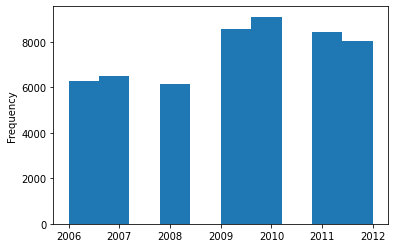

In [13]:
entreprise_df_filtre_06_12["Date de création de l'unité légale"].dt.year.plot.hist()

<AxesSubplot:ylabel='Frequency'>

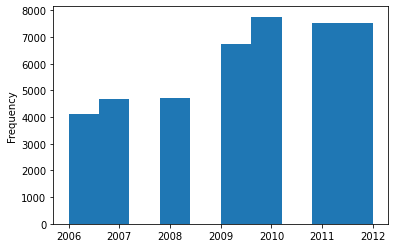

In [14]:
entreprise_df_filtre_06_12[
             np.logical_and(
               entreprise_df_filtre_06_12["Date de création de l'établissement"].dt.year >= 2006,
               entreprise_df_filtre_06_12["Date de création de l'établissement"].dt.year <= 2012
                            )
              ]["Date de création de l'établissement"].dt.year.plot.hist()


In [15]:
entreprise_df_filtre_06_12["Date du début de la période de l'établissement"].dt.year.value_counts().head(5)

2012    6596
2011    6203
2010    5250
2008    5190
2013    4274
Name: Date du début de la période de l'établissement, dtype: int64

In [16]:
entreprise_df_filtre_06_12=entreprise_df[
                                    np.logical_and(
                                            entreprise_df["Date de fermeture de l'établissement"].dt.year >= 2006,
                                            entreprise_df["Date de fermeture de l'établissement"].dt.year <= 2013
                                                    )
                                    ].reset_index(drop=True)

<AxesSubplot:ylabel='Frequency'>

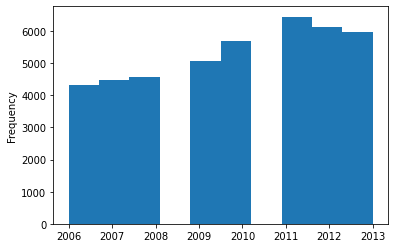

In [17]:
entreprise_df_filtre_06_12["Date de fermeture de l'établissement"].dt.year.plot.hist()

In [18]:
entreprise_df_filtre_06_12["Date de fermeture de l'établissement"].dt.year.value_counts().sort_values(ascending=False).head(5)

2011    6450
2012    6116
2013    5960
2010    5705
2009    5068
Name: Date de fermeture de l'établissement, dtype: int64

### Societe actif de nos jours

In [19]:
entreprise_df["etat_etab"].unique()

array(['Fermé', 'Actif'], dtype=object)

In [20]:
entreprise_df_ouvert=entreprise_df[entreprise_df["etat_etab"]=="Actif"].reset_index(drop=True)

In [21]:
entreprise_df_ouvert=entreprise_df[
                        entreprise_df["Date de la dernière mise à jour de l'établissement"].dt.year >= 2019
                                    ].reset_index(drop=True)
entreprise_df_ouvert.head(3)

,siret,Date de création de l'établissement,Date de création de l'unité légale,Date de fermeture de l'établissement,Date de fermeture de l'unité légale,Date du début de la période de l'établissement,Date de la dernière mise à jour de l'établissement,Nombre de periodes de l'établissement,etat_etab,Enseigne de l'établissement 1,...,Division de l'établissement,Groupe de l'établissement,Classe de l'établissement,Nature juridique de l'unité légale,Adresse de l'établissement,communes,y,x,distance tram t1,proche t1
0,38119255800017,1991-03-11,1991-03-11,1944-08-28,1944-08-28,2008-01-01,2019-01-04 04:02:32,3,Actif,,...,Location et exploitation de biens immobiliers ...,Location et exploitation de biens immobiliers ...,Location de logements,Société civile immobilière,14 RUE GUIGLIA,NICE,43.700182,7.257937,836.12,non
1,34165010900018,1944-08-28,1987-07-19,1989-06-30,1989-06-30,1989-06-30,2019-08-27 14:16:28,1,Fermé,,...,Industrie de mise en oeuvre du batiment et du ...,,"Couverture, plomberie, installations sanitaires",Entrepreneur individuel,64 RTE DE SAINT PIERRE DE FERIC,NICE,43.706248,7.245553,1522.02,non
2,34454631200028,2018-09-19,1988-04-19,1944-08-28,1944-08-28,2018-09-19,2019-07-25 11:10:15,1,Actif,,...,Location et exploitation de biens immobiliers ...,Location et exploitation de biens immobiliers ...,Location de terrains et d'autres biens immobil...,Société civile immobilière,23 BD CARLONE,NICE,43.693601,7.240941,2571.44,non


<AxesSubplot:ylabel='Frequency'>

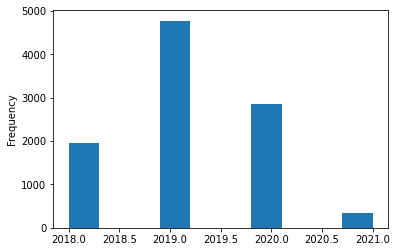

In [22]:
entreprise_df_ouvert[
               entreprise_df_ouvert["Date de création de l'établissement"].dt.year >= 2018
              ]["Date de création de l'établissement"].dt.year.plot.hist()


## Data viz proche du tram

###  Trajet du tram

In [23]:
#Trajet du tram

In [24]:
#IMPORT DE GOOGLE LOUD STORAGE
fichier='gs://trampact_storage/data/coord_T1.csv'

In [25]:
point_trajet_tram_df_copy = pd.read_csv(fichier)
point_trajet_tram_df_copy.head(5)

,Unnamed: 0,y,x
0,0,43.723348,7.285484
1,1,43.722790,7.290817
2,2,43.722704,7.291874
3,3,43.720651,7.291798
4,4,43.719062,7.291645


In [26]:
point_trajet_tram_df=point_trajet_tram_df_copy.copy()

In [27]:
point_trajet_tram = point_trajet_tram_df[['y', 'x']]
point_trajet_tram_list = point_trajet_tram.values.tolist()
print(len(point_trajet_tram_list))

54


In [28]:
import folium
map = folium.Map(location=[43.730707,7.255024], zoom_start=12)

# Ajout d'un debut de la rame
folium.Marker([43.723348, 7.285484],
              popup='Depart du tram T1',
              icon=folium.Icon(color='green')).add_to(map)

# Ajout d'un fin de la rame
folium.Marker([43.730707, 7.255024],
              popup='arrivée du tram T1',
              icon=folium.Icon(color='red')).add_to(map)

folium.PolyLine(point_trajet_tram_list, color='blue', weight=2.5, opacity=0.8).add_to(map)

map

### Selection des commerces proches du tram

In [29]:
import os
# Path
path_v2=".."
path_v3 = "raw_data"
fichier='sirene_nice_clean_T1.csv'
  
# Join various path components 
fichier=os.path.join(path_v2,path_v3, fichier)
fichier

'../raw_data/sirene_nice_clean_T1.csv'

In [30]:
# fichier="gs://trampact_storage/data/sirene_nice_clean_T1.csv"

In [31]:
import pandas as pd
entreprise_t1_df_copy = pd.read_csv(fichier)
entreprise_t1_df_copy

/home/lewagon/.pyenv/versions/3.8.6/envs/trampact/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (0,80) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,SIREN,NIC,siret,Statut de diffusion de l'établissement,Date de création de l'établissement,effectifs,Année de la tranche d'effectif de l'établissement,Activité principale de l'établissement,Date de la dernière mise à jour de l'établissement,Etablissement siège,...,Classe de l'unité légale,SIRET du siège de l'unité légale,Nature juridique de l'unité légale,Première ligne de l'adressage,Date de fermeture de l'unité légale,Filename,y,x,distance tram t1,proche t1
0,337723027,13,33772302700013,O,1944-08-28 00:00:00,1,,67.04,1944-08-28 00:00:00,oui,...,Debits de boissons (sans spectacle),33772302700013,Entrepreneur individuel,Monsieur MAX CHARASSE,1988-09-20,sirene_v3_42,43.700752,7.274309,286.18,oui
1,353509086,24,35350908600024,O,1991-01-03 00:00:00,1,,70.2A,1944-08-28 00:00:00,non,...,Location de logements,35350908600040,Société en nom collectif,SNC L'ORME,,sirene_v3_61,43.702428,7.271502,383.64,oui
2,393719638,16,39371963800016,O,1944-08-28 00:00:00,1,,93.0E,1944-08-28 00:00:00,oui,...,Soins de beaute,39371963800016,Entrepreneur individuel,Madame MYRIAM LAMBIC,1995-12-31,sirene_v3_83,43.709118,7.258244,379.36,oui
3,353509284,17,35350928400017,O,1990-02-01 00:00:00,1,,55.3A,2007-05-19 10:39:01,non,...,Restauration de type rapide,35350928400025,Entrepreneur individuel,Monsieur DANIEL PELLEGRINO,2012-12-31,sirene_v3_61,43.707867,7.263552,31.84,oui
4,387748502,37,38774850200037,O,2016-01-01 00:00:00,1,,47.79Z,2018-05-25 04:12:14,non,...,Commerce de detail de biens d'occasion en magasin,38774850200011,Entrepreneur individuel,Monsieur OLIVIER DURA,,sirene_v3_74,43.704548,7.287596,449.05,oui
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126852,652023961,210,65202396100210,O,1900-01-01 00:00:00,35,2018,77.11A,1944-08-28 00:00:00,non,...,Location de courte duree de voitures et de veh...,65202396103362,"SAS, société par actions simplifiée",AVIS LOCATION DE VOITURES,2017-12-31,,43.701875,7.267464,68.23,oui
126853,523885622,671,52388562200671,O,2020-07-01 00:00:00,1,,47.78C,1944-08-28 00:00:00,non,...,Autres commerces de detail specialises divers,52388562200010,Société à responsabilité limitée (sans autre i...,BLEU LIBELLULE FRANCE,2018-01-31,,43.713769,7.257727,256.14,oui
126854,552046955,10752,55204695510752,O,2020-07-01 00:00:00,1,,35.11Z,1944-08-28 00:00:00,non,...,Production et distribution de vapeur et d'air ...,55204695506065,SA à conseil d'administration (s.a.i.),ENGIE ENERGIE SERVICES,2018-01-31,,43.701795,7.267403,61.90,oui
126855,808529184,1248,80852918401248,O,2016-01-01 00:00:00,1,,68.20B,1944-08-28 00:00:00,non,...,Commerce de gros (commerce interentreprises) d...,80852918400026,"SAS, société par actions simplifiée",YVES ROCHER FRANCE,2018-01-31,,43.699074,7.268806,80.56,oui


In [32]:
entreprise_t1_df=entreprise_t1_df_copy.copy()

In [33]:
#Convertion date
entreprise_t1_df["Date de création de l'unité légale"]=pd.to_datetime(entreprise_t1_df["Date de création de l'unité légale"])
entreprise_t1_df["Date de création de l'établissement"]=pd.to_datetime(entreprise_t1_df["Date de création de l'établissement"])
entreprise_t1_df["Date du début de la période de l'établissement"]=pd.to_datetime(entreprise_t1_df["Date du début de la période de l'établissement"])
entreprise_t1_df["Date de la dernière mise à jour de l'établissement"]=pd.to_datetime(entreprise_t1_df["Date de la dernière mise à jour de l'établissement"])
entreprise_t1_df["Date de fermeture de l'établissement"]=pd.to_datetime(entreprise_t1_df["Date de fermeture de l'établissement"])

### Creation de boite proche de la ligne de tram

#### Année 2006-20012

<AxesSubplot:ylabel='Frequency'>

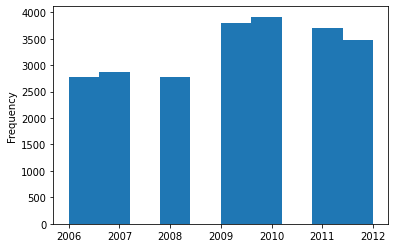

In [34]:
import numpy as np
entreprise_t1_df_filtre_06_12=entreprise_t1_df[
                                    np.logical_and(
                                            entreprise_t1_df["Date de création de l'unité légale"].dt.year >= 2006,
                                            entreprise_t1_df["Date de création de l'unité légale"].dt.year <= 2012
                                                    )
                                    ].reset_index(drop=True)
entreprise_t1_df_filtre_06_12["Date de création de l'unité légale"].dt.year.plot.hist()

In [35]:
entreprise_t1_df_filtre_06_12["Date de création de l'établissement"].dt.year.value_counts().head(5)

2010    3369
2011    3359
2012    3284
2009    2967
2008    2157
Name: Date de création de l'établissement, dtype: int64

In [36]:
len(entreprise_t1_df_filtre_06_12)

23318

<AxesSubplot:ylabel='Frequency'>

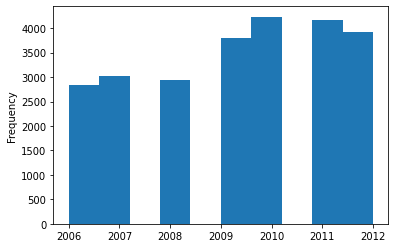

In [37]:
entreprise_t1_df[
             np.logical_and(
               entreprise_t1_df["Date de création de l'établissement"].dt.year >= 2006,
               entreprise_t1_df["Date de création de l'établissement"].dt.year <= 2012
                            )
              ]["Date de création de l'établissement"].dt.year.plot.hist()


In [38]:
entreprise_t1_df_filtre_06_12_sample=entreprise_t1_df_filtre_06_12.sample(n=600)
entreprise_t1_df_sample=entreprise_t1_df_filtre_06_12_sample.reset_index(drop=True)
entreprise_t1_df_filtre_06_12_sample

,SIREN,NIC,siret,Statut de diffusion de l'établissement,Date de création de l'établissement,effectifs,Année de la tranche d'effectif de l'établissement,Activité principale de l'établissement,Date de la dernière mise à jour de l'établissement,Etablissement siège,...,Classe de l'unité légale,SIRET du siège de l'unité légale,Nature juridique de l'unité légale,Première ligne de l'adressage,Date de fermeture de l'unité légale,Filename,y,x,distance tram t1,proche t1
5315,498084904,24,49808490400024,O,2014-06-23,1,,68.20B,2018-04-20 03:56:29,oui,...,Location de terrains et d'autres biens immobil...,49808490400024,Société civile immobilière,ALPHA,,sirene_v3_171,43.702882,7.267852,111.28,oui
21234,528283757,37,52828375700037,O,2015-02-16,1,,86.22C,1944-08-28 00:00:00,non,...,Autres activites des medecins specialistes,52828375700045,Entrepreneur individuel,Madame VANESSA SROM,,sirene-update-sirens-2020-10-06,43.702488,7.266385,35.64,oui
7062,509008157,18,50900815700018,O,2008-10-01,1,,90.01Z,2016-09-20 11:50:05,oui,...,Arts du spectacle vivant,50900815700018,Association déclarée,HTM STUDIO,,sirene_v3_182,43.703903,7.267955,170.18,oui
2321,750073702,11,75007370200011,O,2012-03-10,1,,4399CZ,1944-08-28 00:00:00,oui,...,Travaux de maconnerie generale et gros œuvre d...,75007370200011,Entrepreneur individuel,Monsieur PAUL HARHAS,2018-02-07,sirene-update-sirens-2019-09-17,43.716925,7.255184,179.28,oui
19312,532713674,44,53271367400044,O,2017-05-23,1,,68.20A,1944-08-28 00:00:00,non,...,Location de logements,53271367400028,Entrepreneur individuel,Monsieur THIERRY VASSEUR,,,43.704539,7.266437,76.90,oui
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14809,531962058,16,53196205800016,O,2011-04-06,1,,68.20A,2011-04-27 08:52:53,oui,...,Location de logements,53196205800016,Indivision entre personnes physiques,INDIVISION SIRVENTE,,sirene_v3_205,43.704419,7.288041,492.15,oui
14643,750404238,16,75040423800016,O,2012-04-01,1,,68.31Z,2016-10-02 04:07:38,oui,...,Agences immobilieres,75040423800016,Société à responsabilité limitée (sans autre i...,B.R.Z AZUR,2015-12-31,sirene_v3_219,43.719846,7.262003,336.35,oui
1021,527595557,51,52759555700051,O,2015-01-02,1,,68.20A,2018-06-07 11:32:59,oui,...,Location de logements,52759555700051,Entrepreneur individuel,Monsieur JACQUES CULIOLI,2016-12-21,sirene_v3_200,43.698990,7.264915,332.94,oui
18880,532311362,26,53231136200026,O,2014-06-01,1,,68.20A,1944-08-28 00:00:00,oui,...,Location de logements,53231136200026,Entrepreneur individuel,Madame ELODIE MASCARELLO,2014-12-31,,43.714375,7.258893,190.09,oui


In [39]:
locations = entreprise_t1_df_filtre_06_12_sample[['y', 'x']]
locations_list = locations.values.tolist()
print(len(locations_list))


600


In [40]:
from folium.plugins import MarkerCluster

#folium.TileLayer('sirene proche tram t1').add_to(map)

groupes = MarkerCluster() 
for point in range(0, len(locations_list)):
    mk = folium.Marker(location = locations_list[point], 
                  popup = folium.Popup(entreprise_t1_df_sample["Classe de l'établissement"][point], max_width = 200))
    groupes.add_child(mk)
map.add_child(groupes)
map
